#패키지 로딩

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

In [4]:
x, y = load_iris(return_X_y=True) 

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(x)

In [ ]:
# 주성분 분석
- 차원축소: 4차원 -> 2차원

In [6]:
#데이터 로딩
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


# 주성분 확인

In [7]:
df_pca = pd.DataFrame(iris_pca, columns=['PCA1','PCA2'])
df_pca['class'] = y
display(df_pca.head())

,PCA1,PCA2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


# 2개 차원으로 데이터 시각화

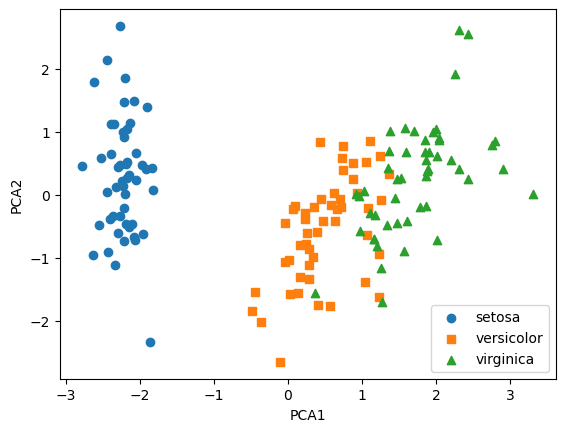

In [12]:
import matplotlib.pyplot as plt
marker = ['o','s','^']
for i, m in enumerate(marker):
    xdata = df_pca[df_pca['class'] == i]['PCA1']
    ydata = df_pca[df_pca['class'] == i]['PCA2']
    plt.scatter(xdata, ydata, marker=m, label=load_iris().target_names[i])
plt.legend()
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# 꽃받침의 길이와 넓이 데이터로 시각화(비교)

In [22]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data[:,:2],columns=iris.feature_names[:2])
iris_df['class'] = iris.target
display(iris_df.head())

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


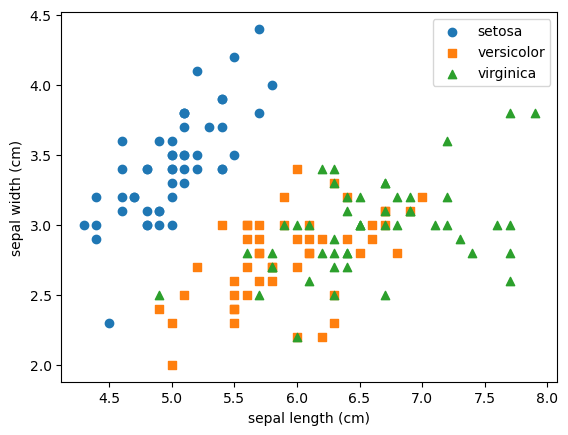

In [24]:
marker = ['o','s','^']
for i, m in enumerate(marker):
    xdata = iris_df[iris_df['class'] == i]['sepal length (cm)']
    ydata = iris_df[iris_df['class'] == i]['sepal width (cm)']
    plt.scatter(xdata, ydata, marker=m, label=load_iris().target_names[i])
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

# PCA에 따른 각각의 PC가 차지하는 변동성, 분산 확인

In [20]:
print(pca.explained_variance_ratio_)
print(f'분산합계:{np.sum(pca.explained_variance_ratio_):.2f}%')

[0.72962445 0.22850762]
분산합계:0.96%


# 적절한 차원 수 선택하기

In [26]:
pca = PCA()
pca.fit(iris_scaled)
cusum = np.cumsum(pca.explained_variance_ratio_)
print(cusum)
# 누적 설명력 = 분산이 0.95를 넘어서는 pc의 개수
d = np.argmax(cusum >= 0.95) + 1
print(d)

[0.72962445 0.95813207 0.99482129 1.        ]


# 주성분 수 선택을 위한 스크리 플롯 (엘보우 메서드) 그리기

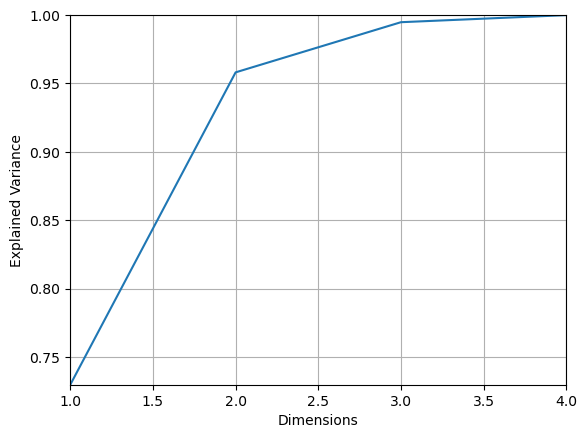

In [28]:
plt.plot(np.arange(1,5),cusum)
plt.axis([1,4,cusum[0],1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

# PCA 성능비교
- 원본데이터와 PCA가 적용된 데이터를 활용한 분류 알고리즘 적용 결과 비교

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
model1 = RandomForestClassifier(random_state=10)
score = cross_validate(model1, iris_scaled, y, scoring=['accuracy','roc_auc_ovr'], cv=5)
for k, v in score.items():
    print('평가지표:',k)
    print('평균값:',np.mean(v))

평가지표: fit_time
평균값: 0.1869964599609375
평가지표: score_time
평균값: 0.03297080993652344
평가지표: test_accuracy
평균값: 0.96
평가지표: test_roc_auc_ovr
평균값: 0.9890000000000001


In [32]:
model2 = RandomForestClassifier(random_state=10)
score = cross_validate(model2, iris_pca, y, scoring=['accuracy','roc_auc_ovr'], cv=5)
for k, v in score.items():
    print('평가지표:',k)
    print('평균값:',np.mean(v))

평가지표: fit_time
평균값: 0.19086070060729982
평가지표: score_time
평균값: 0.028203487396240234
평가지표: test_accuracy
평균값: 0.8866666666666667
평가지표: test_roc_auc_ovr
평균값: 0.9720000000000001
